In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Simple Metropolis: Normal Precision – Gamma

In [53]:
from scipy.stats import gamma
from scipy.stats import uniform

### Choosing Proposal Distribution

The ideal proposal distribution is symmetric. So we first plot any graphes with different parameters.

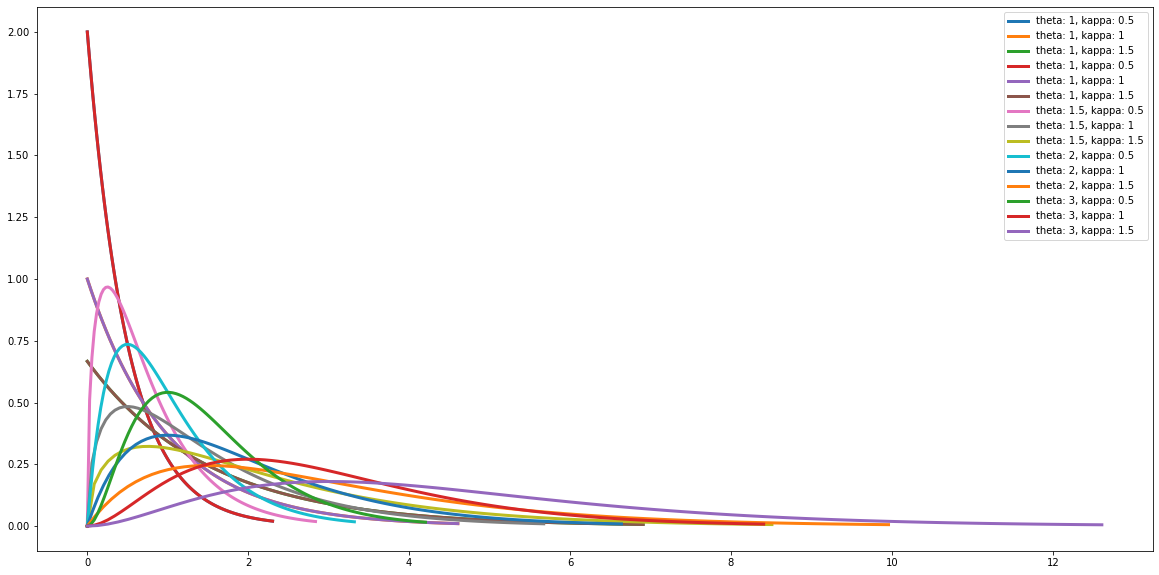

In [54]:
thetas = [1, 1, 1.5, 2, 3]
kapas = [0.5, 1, 1.5]
plt.figure(figsize=(20, 10))
for i in thetas:
    for j in kapas:
        xx = np.linspace(0, gamma.ppf(0.99, a=i, scale=j), 100)
        plt.plot(xx, gamma.pdf(xx, a=i, scale=j), lw=3, label='theta: {}, kappa: {}'.format(i, j))
plt.legend()
plt.show()

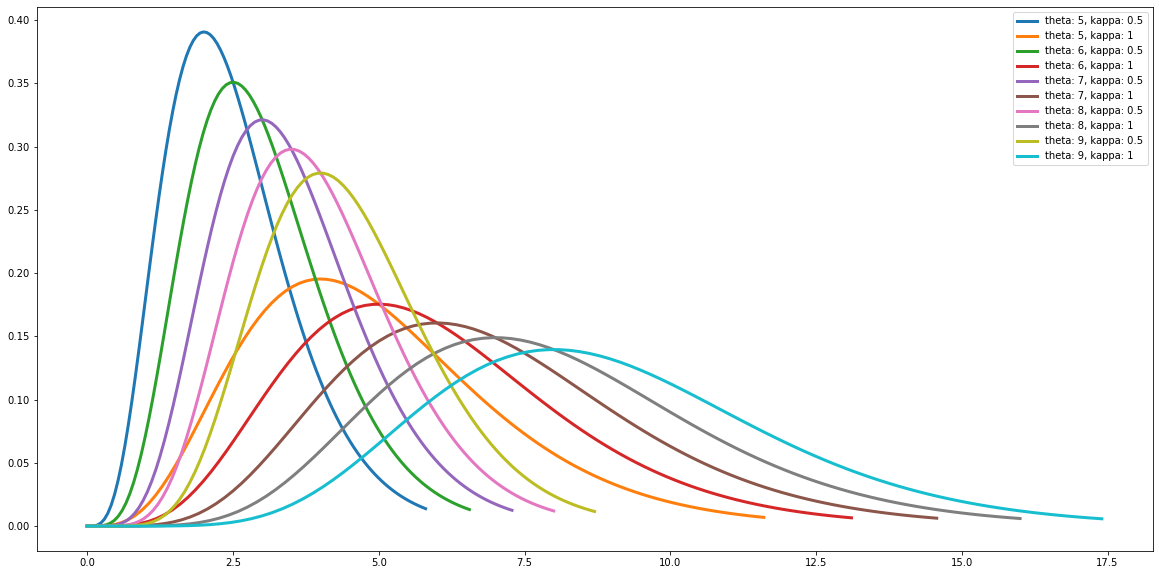

In [55]:
thetas = [5, 6, 7, 8, 9]
kapas = [0.5, 1]
plt.figure(figsize=(20, 10))
for i in thetas:
    for j in kapas:
        xx = np.linspace(0, gamma.ppf(0.99, a=i, scale=j), 100)
        plt.plot(xx, gamma.pdf(xx, a=i, scale=j), lw=3, label='theta: {}, kappa: {}'.format(i, j))
plt.legend()
plt.show()

From the above graphes, we could see $\theta$: 9, $\kappa$: 0.5 look like symmetric distribution

In [72]:
x = -2 # observed value
theta = 1 # initial value
thes = [] # collection 
alpha = 1/2
beta = 1

for i in range(100000):
    theta_prop = np.random.gamma(shape=alpha+0.5, scale=1/(beta+x**2/2)) # get candidates
    r = (np.exp(-(beta+x**2/2) * theta_prop-2 * theta) * theta ** 8) / (np.exp(-(beta+x**2/2) * theta-2 * theta_prop) * theta_prop ** 8)
    rho = min(r, 1)
    if uniform.rvs() < rho:
        the = theta_prop
        thes.append(the)
    else:
        thes.append(the)

In [73]:
np.mean(thes[500:])

0.29243499108023024

In [74]:
np.var(thes[500:])

0.06483107907041753

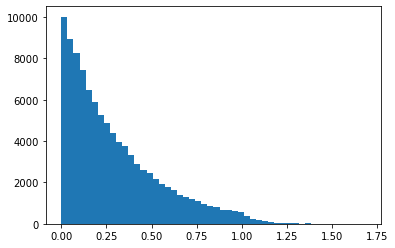

In [76]:
plt.hist(thes[500:], bins=50)
plt.show()

## 2. Normal-Cauchy by Gibbs.

Jeremy models the score on his IQ tests as $N (\theta, \sigma^2)$ with $\sigma^2$ = 90. He places Cauchy $\sim$ Ca(110, 120) prior on $\theta$.

In [4]:
y =  [100, 106, 110, 97, 90, 112, 120, 95, 96, 109]
y_freq = np.mean(y) # 103.5

In [16]:
sigma2 = 90
mu = 110
tau2 = np.sqrt(120)
n=len(y)

theta = 0 # initial value
thetas =[theta]
lamda = 1 #initial value
lambdas=[lamda]
burn =1000
ntotal = 10000 + burn

for i in range(ntotal):
    theta = (tau2/(tau2 + (lamda * sigma2/n))) *  y_freq \
             + ((lamda * sigma2/n)/(tau2 + lamda * sigma2/n)) * mu \
             + np.sqrt(tau2 * (sigma2/n)/(tau2 + (lamda *sigma2/n))) * np.random.randn()
    lamda =  np.random.exponential(1/((tau2 + (theta - mu)**2)/(2*tau2)))
    thetas.append(theta)
    lambdas.append(lamda)

In [17]:
print("Posterior Mean:", np.mean(thetas[burn+1:]))

Posterior Mean: 105.58608212026793


In [18]:
print("Posterior Variance:", np.var(thetas[burn+1:]))

Posterior Variance: 8.158138557793803


In [70]:
# create frequency 
__freq = {}
for i in thetas[burn+1:]:
    if i not in __freq:
        __freq[i] = 1
    else:
        __freq[i] += 1

In [71]:
sum(__freq.values()) # number of observations

10000

In [85]:
freq = {i: j/ 10000 for i, j in __freq.items()}
freq_ = dict(sorted(freq.items(), key=lambda x: x[0], reverse=False))

p_0025 = 0
p_0975 = 0
cum = 0
for i, j in freq_.items():
    cum += j
    if 0.026 > cum >= 0.025:
        p_0025 = i
    if 0.976 > cum >= 0.975:
        p_0975 = i

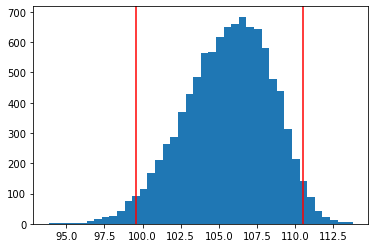

In [88]:
plt.hist(thetas[burn+1:], bins=40)
plt.axvline(x=p_0025,color='r')
plt.axvline(x=p_0975,color='r')
plt.show()

In [89]:
print("95% equi-tailed credible set: [ {} , {} ]".format(p_0025, p_0975))

95% equi-tailed credible set: [ 99.59420029862561 , 110.51581141053717 ]
